In [222]:

import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import warnings

%matplotlib inline

tqdm().pandas()
warnings.filterwarnings("ignore")


In [5]:
# running tdqm with a big list
# my_list = list(range(100000000))
# for x in tqdm(my_list):
#     pass

In [6]:
ls

 O volume na unidade C não tem nome.
 O Número de Série do Volume é B0F8-1721

 Pasta de C:\Users\marcos.silva\OneDrive\datascience\datascience_course\03 Machine Learning intro\09_classification_3

20/05/2019  19:33    <DIR>          .
20/05/2019  19:33    <DIR>          ..
20/05/2019  19:31    <DIR>          .ipynb_checkpoints
20/05/2019  19:15             3.258 gender_submission.csv
20/05/2019  19:15            28.629 test.csv
20/05/2019  19:15            61.194 train.csv
20/05/2019  19:33             1.577 Untitled.ipynb
20/05/2019  19:33               515 Untitled.Rmd
               5 arquivo(s)         95.173 bytes
               3 pasta(s)   66.835.472.384 bytes disponíveis


In [72]:
df = pd.read_csv('train.csv')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
df.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


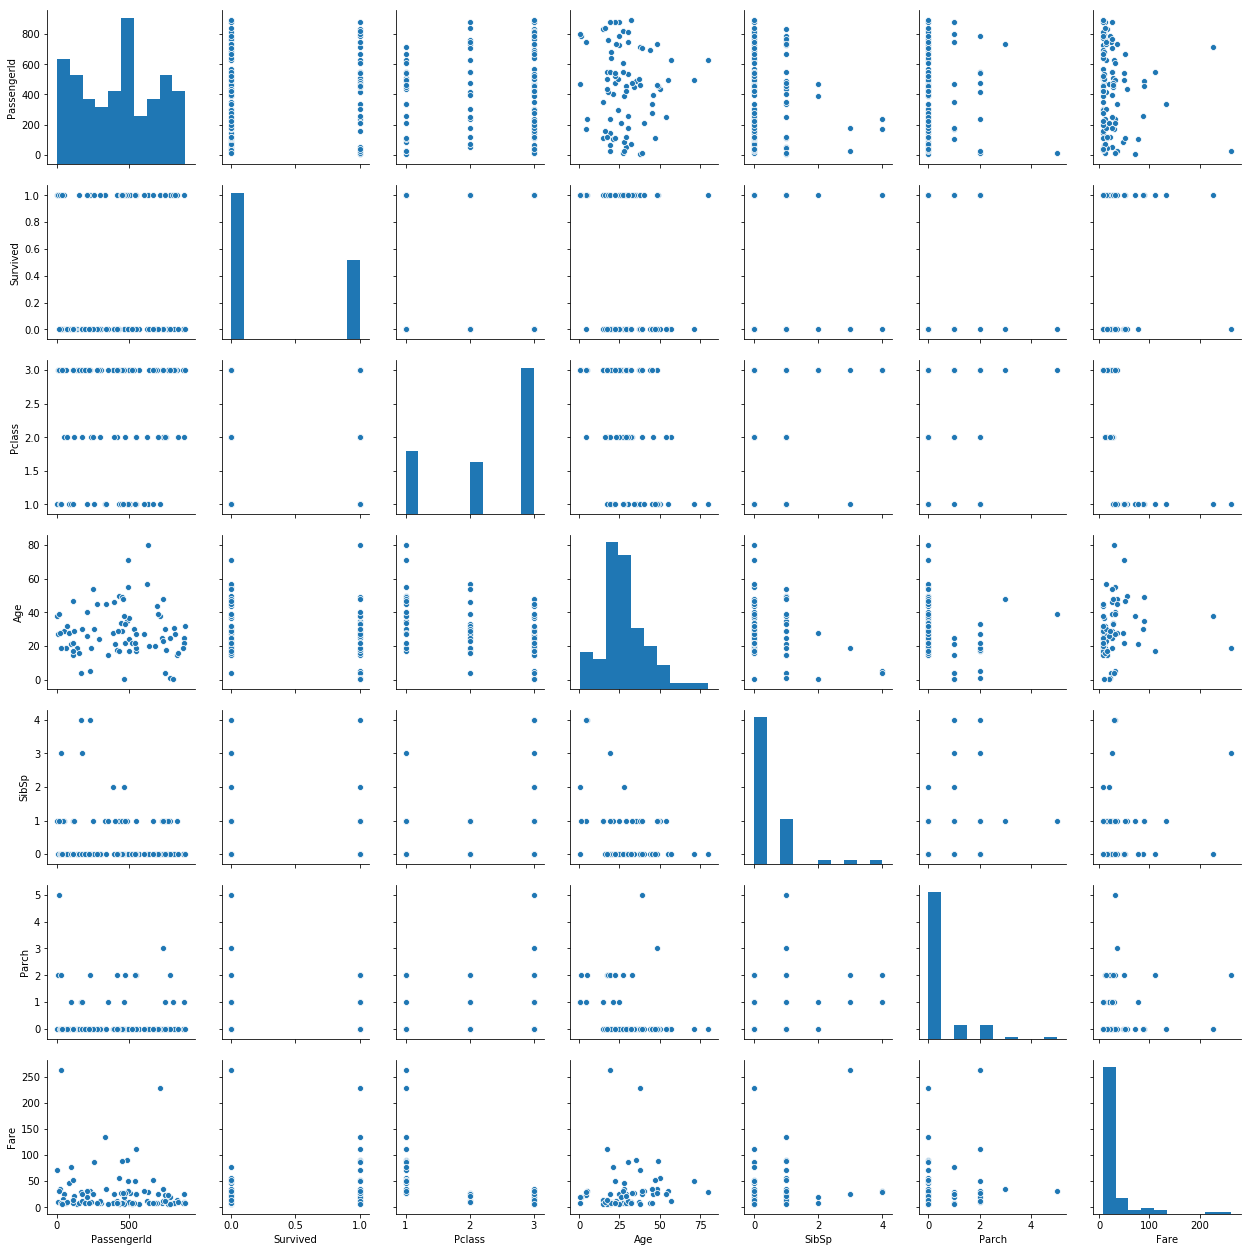

In [16]:
import seaborn as sns

sns.pairplot(df.sample(100))

In [15]:
df['Survived'].value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [20]:
from sklearn.linear_model import LogisticRegression

In [74]:
df['age2'] = df['Age'].fillna(df['Age'].mean())
X_col_name = ['PassengerId', 'Pclass', 'age2', 'SibSp', 'Parch', 'Fare']

In [29]:
modelo = LogisticRegression()

modelo.fit(df[X_col_name], df['Survived'])

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# modelo sem split

In [35]:
X = df[X_col_name]
y = df['Survived']

In [36]:
# métrica com dados de treino
modelo.score(X, y)

0.7025813692480359

In [37]:
from sklearn.model_selection import cross_val_score

In [41]:
cross_val_score(modelo, X, y, cv = 10, scoring='r2').mean()

-0.2661785926491809

In [44]:
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [46]:
cross_val_score(modelo, X, y, cv = 10, scoring='accuracy').mean()

0.7004925661105437

In [48]:
cross_val_score(modelo, X, y, cv = 10, scoring='roc_auc').mean()

0.7325164813400107

In [51]:
modelo.coef_

array([[-6.96589150e-05, -8.12072531e-01, -3.34210517e-02,
        -2.35629133e-01,  2.10688241e-01,  6.10535963e-03]])

In [52]:
list(X)

['PassengerId', 'Pclass', 'age2', 'SibSp', 'Parch', 'Fare']

In [64]:
for x in list(df):
    if x not in list(X) and x != 'Survived':
        print(x)

Name
Sex
Age
Ticket
Cabin
Embarked


In [67]:
def percorer_coluna_name_e_achar_mrs(linha):
    texto_procurado = 'Mr.'
    if texto_procurado in linha['Name']:
        return texto_procurado
    
    
df['Mr.'] = df.apply(percorer_coluna_name_e_achar_mrs, axis=1)    

In [81]:
X_col_name.append('Sex')

X_col_name

['PassengerId', 'Pclass', 'age2', 'SibSp', 'Parch', 'Fare', 'Sex']

In [83]:
X = pd.get_dummies(df[X_col_name], ) 

In [89]:
X.drop(['Sex_male'], axis=1, inplace=True) # or drop_first=False

In [90]:
cross_val_score(modelo, X, y, scoring='roc_auc', cv=10).mean()

0.8505683162153751

In [93]:
modelo.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
modelo.coef_

array([[ 1.77836596e-04, -9.52140922e-01, -3.43207309e-02,
        -3.26773854e-01, -1.06271148e-01,  3.94375737e-03,
         2.65080693e+00]])

In [96]:
for variavel_categorica in ['Ticket', 'Cabin', 'Embarked']:
    print(variavel_categorica)
    print(df[variavel_categorica].value_counts())

Ticket
1601                7
CA. 2343            7
347082              7
CA 2144             6
3101295             6
347088              6
S.O.C. 14879        5
382652              5
2666                4
LINE                4
113760              4
W./C. 6608          4
19950               4
PC 17757            4
17421               4
4133                4
113781              4
347077              4
349909              4
13502               3
PC 17760            3
C.A. 31921          3
PC 17755            3
F.C.C. 13529        3
SC/Paris 2123       3
345773              3
230080              3
347742              3
24160               3
35273               3
                   ..
349218              1
345777              1
2926                1
28228               1
PC 17756            1
392091              1
345765              1
A/5 21173           1
350406              1
29108               1
28425               1
350047              1
315153              1
14973               1
PC 

In [100]:
df['first_character_of_Cabin'] = df['Cabin'].str[0:1]

df['first_character_of_Cabin'] = df['first_character_of_Cabin'].fillna('Z')

In [102]:
df['first_character_of_Cabin'].value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: first_character_of_Cabin, dtype: int64

In [103]:
X_col_name.append('first_character_of_Cabin')
X_col_name.append('Embarked')

In [105]:
df[X_col_name].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId                 891 non-null int64
Pclass                      891 non-null int64
age2                        891 non-null float64
SibSp                       891 non-null int64
Parch                       891 non-null int64
Fare                        891 non-null float64
Sex                         891 non-null object
first_character_of_Cabin    891 non-null object
Embarked                    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [110]:
# substituindo pela média condional -> método de imputation
a_completar = df[df['Embarked'].isnull()]

treinamento_intermediario = df[~(df['Embarked'].isnull())]

In [112]:
list(df.describe())

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'age2']

In [113]:
X_intermediario = treinamento_intermediario[['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'age2']]

y_intermediario = treinamento_intermediario['Embarked']

In [114]:
modelo.fit(X_intermediario, y_intermediario)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
modelo.score(X_intermediario, y_intermediario)

0.7300337457817773

In [122]:
yhat_inter=modelo.predict(a_completar[['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'age2']])

In [123]:
yhat_inter

array(['S', 'S'], dtype=object)

In [127]:
df['Embarked'] = df['Embarked'].fillna('S') # output do modelo intermediario

# Rodando com todas as variaveis as variaveis criadas

In [133]:
X = pd.get_dummies(df[X_col_name], drop_first=True)

In [137]:
cross_val_score(estimator=modelo, X=X, y=y, scoring='roc_auc', cv=10).mean()

0.8535468126644596

In [129]:
import xgboost as xgb

In [138]:
megazord = xgb.XGBClassifier()

In [139]:
cross_val_score(megazord, X, y, scoring='roc_auc', cv=10).mean()

0.8672818521347934

In [140]:
from imblearn.over_sampling import SMOTE

In [150]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 342
Before OverSampling, counts of label '0': 549 

After OverSampling, the shape of train_X: (1098, 17)
After OverSampling, the shape of train_y: (1098,) 

After OverSampling, counts of label '1': 549
After OverSampling, counts of label '0': 549


In [143]:
549-342

207

In [154]:
megazord.fit(X_train_res,
             y_train_res)

megazord.score(X_train_res, y_train_res)

0.8834244080145719

In [159]:
cross_val_score(megazord,
                X_train_res,
                y_train_res,
                scoring='roc_auc',
                cv=5).mean()

0.5510639113356209

# Parametrizando o Megazord

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
megazord

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [167]:
param_grid = {'n_estimators':[300],
              'reg_alpha': [0, 0.001, 0.01, 0.05],
              'reg_lambda': [0, 0.001, 0.01, 0.05],
              'max_depth': [4, 5]}

In [168]:
param_grid

{'n_estimators': [300],
 'reg_alpha': [0, 0.001, 0.01, 0.05],
 'reg_lambda': [0, 0.001, 0.01, 0.05],
 'max_depth': [4, 5]}

In [175]:
model_gs = GridSearchCV(megazord, param_grid, scoring='roc_auc', cv=5, n_jobs=5)
model_gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.001, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_estimators': [300], 'reg_alpha': [0, 0.001, 0.01, 0.05], 'reg_lambda': [0, 0.001, 0.01, 0.05], 'max_depth': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [176]:
model_gs.best_params_

{'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0.01}

In [178]:
megazord = xgb.XGBClassifier(max_depth=5,
                             n_estimators= 300,
                             reg_alpha= 0,
                             reg_lambda= 0.01)

In [180]:
cross_val_score(megazord,
                X,
                y,
                scoring='roc_auc',
                cv=10).mean()

0.8375199898141075

In [181]:
df_teste = pd.read_csv('test.csvt.csv')

In [183]:
list(X)

['PassengerId',
 'Pclass',
 'age2',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'first_character_of_Cabin_B',
 'first_character_of_Cabin_C',
 'first_character_of_Cabin_D',
 'first_character_of_Cabin_E',
 'first_character_of_Cabin_F',
 'first_character_of_Cabin_G',
 'first_character_of_Cabin_T',
 'first_character_of_Cabin_Z',
 'Embarked_Q',
 'Embarked_S']

In [189]:
df_teste['first_character_of_Cabin'] = df_teste.Cabin.str[0:1]

df_teste['first_character_of_Cabin'].fillna('Z', inplace=True)

df_teste['age2'] = df_teste['Age'].fillna(X.age2.mean())

In [190]:
df_teste.Age.mean() # substituir pela média do teste pode(vai) causar viés.

30.272590361445783

In [192]:
df_teste.Embarked.isnull().sum()

0

In [196]:
df_teste['Fare'] = df_teste['Fare'].fillna(df['Fare'].mean())

In [198]:
df_teste_all_dummies = pd.get_dummies(df_teste)

In [199]:
df_teste_all_dummies[list(X)]

KeyError: "['first_character_of_Cabin_T'] not in index"

In [202]:
for x in list(X):
    
    if x not in list(df_teste_all_dummies):
        
        df_teste_all_dummies[x] = 0

In [204]:
megazord.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [208]:
x

'Embarked_S'

In [209]:
df_teste_all_dummies.shape

(418, 878)

In [211]:
modelo.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
megazord.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [220]:
yhat1 = modelo.predict_proba(df_teste_all_dummies[list(X)])
yhat2 = megazord.predict_proba(df_teste_all_dummies[list(X)])